#### Serena Wisneski 
CSC 405 <br>
COVID Team 3 <br>
Project Stage II <br>
Indivual Notebook <br>

**Import Libraries**


In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy
from scipy import stats

**Import Data Sets**

In [2]:
main_data = pd.read_csv("../data/covid_large.csv")
education_data = pd.read_csv("../data/EducationEnrichment_data_with_overlays.csv")
main_data

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population
0,AL,0,statewide unallocated,2020-01-22,0,0,0
1,AL,0,statewide unallocated,2020-01-23,0,0,0
2,AL,0,statewide unallocated,2020-01-24,0,0,0
3,AL,0,statewide unallocated,2020-01-25,0,0,0
4,AL,0,statewide unallocated,2020-01-26,0,0,0
...,...,...,...,...,...,...,...
757210,WY,56045,weston county,2020-09-10,21,0,6927
757211,WY,56045,weston county,2020-09-11,21,0,6927
757212,WY,56045,weston county,2020-09-12,23,0,6927
757213,WY,56045,weston county,2020-09-13,23,0,6927


## Task 1
*Generate weekly statistics (mean, median, mode) for number of new cases and deaths across Virginia*

In [3]:
VA_main_data = main_data.loc[main_data['State'] == 'VA']
VA_main_data

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population
679716,VA,0,statewide unallocated,2020-01-22,0,0,0
679717,VA,0,statewide unallocated,2020-01-23,0,0,0
679718,VA,0,statewide unallocated,2020-01-24,0,0,0
679719,VA,0,statewide unallocated,2020-01-25,0,0,0
679720,VA,0,statewide unallocated,2020-01-26,0,0,0
...,...,...,...,...,...,...,...
711469,VA,51840,winchester city,2020-09-10,461,4,28078
711470,VA,51840,winchester city,2020-09-11,461,4,28078
711471,VA,51840,winchester city,2020-09-12,465,4,28078
711472,VA,51840,winchester city,2020-09-13,467,4,28078


normalize statewide by population

In [4]:
VA_normalized_data = VA_main_data.copy()
VA_normalized_data['New Cases Per Day'] = VA_normalized_data['Num of Cases'].diff()
VA_normalized_data['New Deaths Per Day'] = VA_normalized_data['Num of Deaths'].diff()
VA_normalized_data = VA_normalized_data.groupby("Date").sum().reset_index()
VA_normalized_data['New Cases Per Day Normalized VA']= (VA_normalized_data['New Cases Per Day']/VA_normalized_data['population'])*1000000
VA_normalized_data['New Deaths Per Day Normalized VA']= (VA_normalized_data['New Deaths Per Day']/VA_normalized_data['population'])*1000000
VA_normalized_data= VA_normalized_data[VA_normalized_data['Date'] != '2020-01-22']
VA_normalized_data = VA_normalized_data.fillna(0)
VA_normalized_data

,Date,countyFIPS,Num of Cases,Num of Deaths,population,New Cases Per Day,New Deaths Per Day,New Cases Per Day Normalized VA,New Deaths Per Day Normalized VA
1,2020-01-23,6818111,0,0,8535519,0.0,0.0,0.000000,0.000000
2,2020-01-24,6818111,0,0,8535519,0.0,0.0,0.000000,0.000000
3,2020-01-25,6818111,0,0,8535519,0.0,0.0,0.000000,0.000000
4,2020-01-26,6818111,0,0,8535519,0.0,0.0,0.000000,0.000000
5,2020-01-27,6818111,0,0,8535519,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
232,2020-09-10,6818111,130519,2707,8535519,1236.0,11.0,144.806660,1.288732
233,2020-09-11,6818111,131637,2711,8535519,1118.0,4.0,130.982076,0.468630
234,2020-09-12,6818111,132939,2722,8535519,1302.0,11.0,152.539055,1.288732
235,2020-09-13,6818111,133808,2724,8535519,869.0,2.0,101.809861,0.234315


Group data by week

In [5]:
VA_State_Weekly = VA_normalized_data.copy()
VA_State_Weekly['Date'] = VA_State_Weekly.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
VA_State_Weekly = VA_State_Weekly.groupby([ pd.Grouper(key='Date', freq='w')])['New Cases Per Day Normalized VA','New Deaths Per Day Normalized VA'].agg({'New Cases Per Day Normalized VA':'mean', 'New Deaths Per Day Normalized VA' :'mean'}).reset_index().round(decimals=0)
VA_State_Weekly

,Date,New Cases Per Day Normalized VA,New Deaths Per Day Normalized VA
0,2020-01-26,0.0,0.0
1,2020-02-02,0.0,0.0
2,2020-02-09,0.0,0.0
3,2020-02-16,0.0,0.0
4,2020-02-23,0.0,0.0
5,2020-03-01,0.0,0.0
6,2020-03-08,0.0,0.0
7,2020-03-15,1.0,0.0
8,2020-03-22,3.0,0.0
9,2020-03-29,11.0,0.0


Get mean, median, mode

In [6]:
VA_State_Weekly["New Cases Per Day Normalized VA"].agg(["mean","median"])

mean      66.428571
median    74.000000
Name: New Cases Per Day Normalized VA, dtype: float64

In [7]:
VA_State_Weekly["New Deaths Per Day Normalized VA"].agg(["mean","median"])

mean      1.371429
median    1.000000
Name: New Deaths Per Day Normalized VA, dtype: float64

In [8]:
VA_State_Weekly["New Cases Per Day Normalized VA"].mode()

0    0.0
dtype: float64

In [9]:
VA_State_Weekly["New Deaths Per Day Normalized VA"].mode()

0    0.0
1    2.0
dtype: float64

*Compare the data against North Carolina, New York, Colorado, Alabama, and Vermont*

Get NC data

In [10]:
NC_main_data = main_data.loc[main_data['State'] == 'NC']

NC_normalized_data = NC_main_data.copy()
NC_normalized_data['New Cases Per Day'] = NC_normalized_data['Num of Cases'].diff()
NC_normalized_data['New Deaths Per Day'] = NC_normalized_data['Num of Deaths'].diff()
NC_normalized_data = NC_normalized_data.groupby("Date").sum().reset_index()
NC_normalized_data['New Cases Per Day Normalized NC']= (NC_normalized_data['New Cases Per Day']/NC_normalized_data['population'])*1000000
NC_normalized_data['New Deaths Per Day Normalized NC']= (NC_normalized_data['New Deaths Per Day']/NC_normalized_data['population'])*1000000
NC_normalized_data= NC_normalized_data[NC_normalized_data['Date'] != '2020-01-22']
NC_normalized_data = NC_normalized_data.fillna(0)

NC_State_Weekly = NC_normalized_data.copy()
NC_State_Weekly['Date'] = NC_State_Weekly.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
NC_State_Weekly = NC_State_Weekly.groupby([ pd.Grouper(key='Date', freq='w')])['New Cases Per Day Normalized NC','New Deaths Per Day Normalized NC'].agg({'New Cases Per Day Normalized NC':'mean', 'New Deaths Per Day Normalized NC' :'mean'}).reset_index().round(decimals=0)
NC_State_Weekly

,Date,New Cases Per Day Normalized NC,New Deaths Per Day Normalized NC
0,2020-01-26,0.0,0.0
1,2020-02-02,0.0,0.0
2,2020-02-09,0.0,0.0
3,2020-02-16,0.0,0.0
4,2020-02-23,0.0,0.0
5,2020-03-01,0.0,0.0
6,2020-03-08,0.0,0.0
7,2020-03-15,0.0,0.0
8,2020-03-22,3.0,0.0
9,2020-03-29,12.0,0.0


Get NY Data

In [11]:
NY_main_data = main_data.loc[main_data['State'] == 'NY']

NY_normalized_data = NY_main_data.copy()
NY_normalized_data['New Cases Per Day'] = NY_normalized_data['Num of Cases'].diff()
NY_normalized_data['New Deaths Per Day'] = NY_normalized_data['Num of Deaths'].diff()
NY_normalized_data = NY_normalized_data.groupby("Date").sum().reset_index()
NY_normalized_data['New Cases Per Day Normalized NY']= (NY_normalized_data['New Cases Per Day']/NY_normalized_data['population'])*1000000
NY_normalized_data['New Deaths Per Day Normalized NY']= (NY_normalized_data['New Deaths Per Day']/NY_normalized_data['population'])*1000000
NY_normalized_data= NY_normalized_data[NY_normalized_data['Date'] != '2020-01-22']
NY_normalized_data = NY_normalized_data.fillna(0)

NY_State_Weekly = NY_normalized_data.copy()
NY_State_Weekly['Date'] = NY_State_Weekly.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
NY_State_Weekly = NY_State_Weekly.groupby([ pd.Grouper(key='Date', freq='w')])['New Cases Per Day Normalized NY','New Deaths Per Day Normalized NY'].agg({'New Cases Per Day Normalized NY':'mean', 'New Deaths Per Day Normalized NY' :'mean'}).reset_index().round(decimals=0)
NY_State_Weekly

,Date,New Cases Per Day Normalized NY,New Deaths Per Day Normalized NY
0,2020-01-26,0.0,0.0
1,2020-02-02,0.0,0.0
2,2020-02-09,0.0,0.0
3,2020-02-16,0.0,0.0
4,2020-02-23,0.0,0.0
5,2020-03-01,0.0,0.0
6,2020-03-08,1.0,0.0
7,2020-03-15,4.0,0.0
8,2020-03-22,112.0,1.0
9,2020-03-29,319.0,6.0


Get CO Data

In [12]:
CO_main_data = main_data.loc[main_data['State'] == 'CO']

CO_normalized_data = CO_main_data.copy()
CO_normalized_data['New Cases Per Day'] = CO_normalized_data['Num of Cases'].diff()
CO_normalized_data['New Deaths Per Day'] = CO_normalized_data['Num of Deaths'].diff()
CO_normalized_data = CO_normalized_data.groupby("Date").sum().reset_index()
CO_normalized_data['New Cases Per Day Normalized CO']= (CO_normalized_data['New Cases Per Day']/CO_normalized_data['population'])*1000000
CO_normalized_data['New Deaths Per Day Normalized CO']= (CO_normalized_data['New Deaths Per Day']/CO_normalized_data['population'])*1000000
CO_normalized_data= CO_normalized_data[CO_normalized_data['Date'] != '2020-01-22']
CO_normalized_data = CO_normalized_data.fillna(0)

CO_State_Weekly = CO_normalized_data.copy()
CO_State_Weekly['Date'] = CO_State_Weekly.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
CO_State_Weekly = CO_State_Weekly.groupby([ pd.Grouper(key='Date', freq='w')])['New Cases Per Day Normalized CO','New Deaths Per Day Normalized CO'].agg({'New Cases Per Day Normalized CO':'mean', 'New Deaths Per Day Normalized CO' :'mean'}).reset_index().round(decimals=0)
CO_State_Weekly

,Date,New Cases Per Day Normalized CO,New Deaths Per Day Normalized CO
0,2020-01-26,0.0,0.0
1,2020-02-02,0.0,0.0
2,2020-02-09,0.0,0.0
3,2020-02-16,0.0,0.0
4,2020-02-23,0.0,0.0
5,2020-03-01,0.0,0.0
6,2020-03-08,0.0,0.0
7,2020-03-15,3.0,0.0
8,2020-03-22,11.0,0.0
9,2020-03-29,43.0,1.0


Get AL Data

In [13]:
AL_main_data = main_data.loc[main_data['State'] == 'AL']

AL_normalized_data = AL_main_data.copy()
AL_normalized_data['New Cases Per Day'] = AL_normalized_data['Num of Cases'].diff()
AL_normalized_data['New Deaths Per Day'] = AL_normalized_data['Num of Deaths'].diff()
AL_normalized_data = AL_normalized_data.groupby("Date").sum().reset_index()
AL_normalized_data['New Cases Per Day Normalized AL']= (AL_normalized_data['New Cases Per Day']/AL_normalized_data['population'])*1000000
AL_normalized_data['New Deaths Per Day Normalized AL']= (AL_normalized_data['New Deaths Per Day']/AL_normalized_data['population'])*1000000
AL_normalized_data= AL_normalized_data[AL_normalized_data['Date'] != '2020-01-22']
AL_normalized_data = AL_normalized_data.fillna(0)

AL_State_Weekly = AL_normalized_data.copy()
AL_State_Weekly['Date'] = AL_State_Weekly.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
AL_State_Weekly = AL_State_Weekly.groupby([ pd.Grouper(key='Date', freq='w')])['New Cases Per Day Normalized AL','New Deaths Per Day Normalized AL'].agg({'New Cases Per Day Normalized AL':'mean', 'New Deaths Per Day Normalized AL' :'mean'}).reset_index().round(decimals=0)
AL_State_Weekly

,Date,New Cases Per Day Normalized AL,New Deaths Per Day Normalized AL
0,2020-01-26,0.0,0.0
1,2020-02-02,0.0,0.0
2,2020-02-09,0.0,0.0
3,2020-02-16,0.0,0.0
4,2020-02-23,0.0,0.0
5,2020-03-01,0.0,0.0
6,2020-03-08,0.0,0.0
7,2020-03-15,1.0,0.0
8,2020-03-22,4.0,0.0
9,2020-03-29,19.0,0.0


Get Vermont Data

In [14]:
VT_main_data = main_data.loc[main_data['State'] == 'VT']

VT_normalized_data = VT_main_data.copy()
VT_normalized_data['New Cases Per Day'] = VT_normalized_data['Num of Cases'].diff()
VT_normalized_data['New Deaths Per Day'] = VT_normalized_data['Num of Deaths'].diff()
VT_normalized_data = VT_normalized_data.groupby("Date").sum().reset_index()
VT_normalized_data['New Cases Per Day Normalized VT']= (VT_normalized_data['New Cases Per Day']/VT_normalized_data['population'])*1000000
VT_normalized_data['New Deaths Per Day Normalized VT']= (VT_normalized_data['New Deaths Per Day']/VT_normalized_data['population'])*1000000
VT_normalized_data= VT_normalized_data[VT_normalized_data['Date'] != '2020-01-22']
VT_normalized_data = VT_normalized_data.fillna(0)

VT_State_Weekly = VT_normalized_data.copy()
VT_State_Weekly['Date'] = VT_State_Weekly.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
VT_State_Weekly = VT_State_Weekly.groupby([ pd.Grouper(key='Date', freq='w')])['New Cases Per Day Normalized VT','New Deaths Per Day Normalized VT'].agg({'New Cases Per Day Normalized VT':'mean', 'New Deaths Per Day Normalized VT' :'mean'}).reset_index().round(decimals=0)
VT_State_Weekly

,Date,New Cases Per Day Normalized VT,New Deaths Per Day Normalized VT
0,2020-01-26,0.0,0.0
1,2020-02-02,0.0,0.0
2,2020-02-09,0.0,0.0
3,2020-02-16,0.0,0.0
4,2020-02-23,0.0,0.0
5,2020-03-01,0.0,0.0
6,2020-03-08,0.0,0.0
7,2020-03-15,1.0,0.0
8,2020-03-22,11.0,0.0
9,2020-03-29,41.0,2.0


Group state data together

In [15]:
merge1 = pd.merge(VA_State_Weekly, NC_State_Weekly)
merge2 = pd.merge(CO_State_Weekly, AL_State_Weekly)
merge3 = pd.merge(NY_State_Weekly, VT_State_Weekly)
merge4 = pd.merge(merge1, merge2)
VA_NC_CO_AL_NY_VT = pd.merge(merge3, merge4)
VA_NC_CO_AL_NY_VT

,Date,New Cases Per Day Normalized NY,New Deaths Per Day Normalized NY,New Cases Per Day Normalized VT,New Deaths Per Day Normalized VT,New Cases Per Day Normalized VA,New Deaths Per Day Normalized VA,New Cases Per Day Normalized NC,New Deaths Per Day Normalized NC,New Cases Per Day Normalized CO,New Deaths Per Day Normalized CO,New Cases Per Day Normalized AL,New Deaths Per Day Normalized AL
0,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-02-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-02-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2020-03-08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2020-03-15,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0
8,2020-03-22,112.0,1.0,11.0,0.0,3.0,0.0,3.0,0.0,11.0,0.0,4.0,0.0
9,2020-03-29,319.0,6.0,41.0,2.0,11.0,0.0,12.0,0.0,43.0,1.0,19.0,0.0


Display as graph

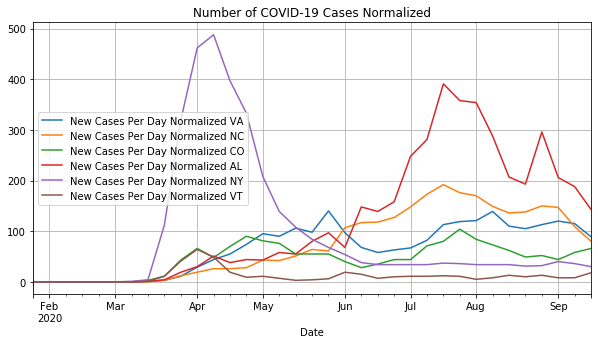

In [16]:
VAcases = VA_NC_CO_AL_NY_VT.groupby('Date')['New Cases Per Day Normalized VA'].sum()
NCcases = VA_NC_CO_AL_NY_VT.groupby('Date')['New Cases Per Day Normalized NC'].sum()
COcases = VA_NC_CO_AL_NY_VT.groupby('Date')['New Cases Per Day Normalized CO'].sum()
ALcases = VA_NC_CO_AL_NY_VT.groupby('Date')['New Cases Per Day Normalized AL'].sum()
NYcases = VA_NC_CO_AL_NY_VT.groupby('Date')['New Cases Per Day Normalized NY'].sum()
VTcases = VA_NC_CO_AL_NY_VT.groupby('Date')['New Cases Per Day Normalized VT'].sum()

VAcases.plot(title='Number of COVID-19 Cases',figsize=(10,5), grid=True,legend=True)
NCcases.plot(title='Number of COVID-19 Cases',figsize=(10,5), grid=True,legend=True)
COcases.plot(title='Number of COVID-19 Cases',figsize=(10,5), grid=True,legend=True)
ALcases.plot(title='Number of COVID-19 Cases',figsize=(10,5), grid=True,legend=True)
NYcases.plot(title='Number of COVID-19 Cases',figsize=(10,5), grid=True,legend=True)
VTcases.plot(title='Number of COVID-19 Cases Normalized',figsize=(10,5), grid=True,legend=True)

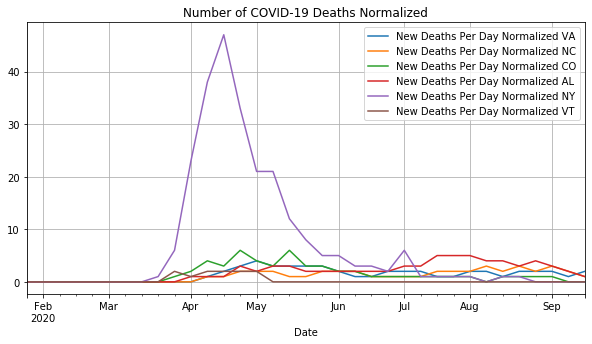

In [17]:
VAdeaths = VA_NC_CO_AL_NY_VT.groupby('Date')['New Deaths Per Day Normalized VA'].sum()
NCdeaths = VA_NC_CO_AL_NY_VT.groupby('Date')['New Deaths Per Day Normalized NC'].sum()
COdeaths = VA_NC_CO_AL_NY_VT.groupby('Date')['New Deaths Per Day Normalized CO'].sum()
ALdeaths = VA_NC_CO_AL_NY_VT.groupby('Date')['New Deaths Per Day Normalized AL'].sum()
NYdeaths = VA_NC_CO_AL_NY_VT.groupby('Date')['New Deaths Per Day Normalized NY'].sum()
VTdeaths = VA_NC_CO_AL_NY_VT.groupby('Date')['New Deaths Per Day Normalized VT'].sum()

VAdeaths.plot(title='Number of COVID-19 Deaths',figsize=(10,5), grid=True,legend=True)
NCdeaths.plot(title='Number of COVID-19 Deaths',figsize=(10,5), grid=True,legend=True)
COdeaths.plot(title='Number of COVID-19 Deaths',figsize=(10,5), grid=True,legend=True)
ALdeaths.plot(title='Number of COVID-19 Deaths',figsize=(10,5), grid=True,legend=True)
NYdeaths.plot(title='Number of COVID-19 Deaths',figsize=(10,5), grid=True,legend=True)
VTdeaths.plot(title='Number of COVID-19 Deaths Normalized',figsize=(10,5), grid=True,legend=True)

*Identify counties within Virgina with high case and death rates normalized by population*

Get county data

In [18]:
VA_data = VA_main_data.copy()
VA_data['New Cases Per Day'] = VA_data['Num of Cases'].diff()
VA_data['New Deaths Per Day'] = VA_data['Num of Deaths'].diff()
VA_data['New Cases Per Day Normalized']= (VA_data['New Cases Per Day']/VA_data['population'])*1000
VA_data['New Deaths Per Day Normalized']= (VA_data['New Deaths Per Day']/VA_data['population'])*1000
VA_data= VA_data[VA_data['Date'] != '2020-01-22']
VA_data = VA_data.fillna(0)
VA_data

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,New Cases Per Day,New Deaths Per Day,New Cases Per Day Normalized,New Deaths Per Day Normalized
679717,VA,0,statewide unallocated,2020-01-23,0,0,0,0.0,0.0,0.000000,0.0
679718,VA,0,statewide unallocated,2020-01-24,0,0,0,0.0,0.0,0.000000,0.0
679719,VA,0,statewide unallocated,2020-01-25,0,0,0,0.0,0.0,0.000000,0.0
679720,VA,0,statewide unallocated,2020-01-26,0,0,0,0.0,0.0,0.000000,0.0
679721,VA,0,statewide unallocated,2020-01-27,0,0,0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
711469,VA,51840,winchester city,2020-09-10,461,4,28078,0.0,0.0,0.000000,0.0
711470,VA,51840,winchester city,2020-09-11,461,4,28078,0.0,0.0,0.000000,0.0
711471,VA,51840,winchester city,2020-09-12,465,4,28078,4.0,0.0,0.142460,0.0
711472,VA,51840,winchester city,2020-09-13,467,4,28078,2.0,0.0,0.071230,0.0


Get top 5 counties

In [19]:
VA_data_cases = VA_data.groupby('County Name')['New Cases Per Day Normalized'].max()
VA_data_deaths = VA_data.groupby('County Name')['New Deaths Per Day Normalized'].max()
VA_high = pd.concat([VA_data_cases, VA_data_deaths], axis=1)
VA_high.columns = ["Cases", "Deaths"]
VA_high.sort_values(['Cases', 'Deaths'], ascending=[False, False])

,Cases,Deaths
County Name,,
richmond county,6.317189,0.110828
greensville county,5.557516,0.264644
galax city,5.041752,0.787774
emporia city,4.115226,0.748223
radford city,3.726232,0.000000
...,...,...
rockbridge county,0.221504,0.044301
louisa county,0.212817,0.026602
orange county,0.188929,0.026990


In [20]:
high_cases  = VA_high.nlargest(10, ['Cases'])
high_cases

,Cases,Deaths
County Name,,
richmond county,6.317189,0.110828
greensville county,5.557516,0.264644
galax city,5.041752,0.787774
emporia city,4.115226,0.748223
radford city,3.726232,0.000000
northampton county,3.415884,0.341588
southampton county,3.346379,0.113437
buckingham county,3.207371,0.116632
franklin city,2.761391,0.251036


In [21]:
high_deaths  = VA_high.nlargest(10, ['Deaths'])
high_deaths

,Cases,Deaths
County Name,,
galax city,5.041752,0.787774
emporia city,4.115226,0.748223
northampton county,3.415884,0.341588
colonial heights city,0.575705,0.287853
charles city county,0.574465,0.287233
greensville county,5.557516,0.264644
mecklenburg county,1.798150,0.261549
franklin city,2.761391,0.251036
page county,2.510250,0.251025


In [22]:
high_counties = pd.merge(high_cases, high_deaths, left_index=True, right_index=True)
high_counties

,Cases_x,Deaths_x,Cases_y,Deaths_y
County Name,,,,
greensville county,5.557516,0.264644,5.557516,0.264644
galax city,5.041752,0.787774,5.041752,0.787774
emporia city,4.115226,0.748223,4.115226,0.748223
northampton county,3.415884,0.341588,3.415884,0.341588
franklin city,2.761391,0.251036,2.761391,0.251036


Since Greensville County, Galax City, Emporia City, Northamption County, and Franklin City are all in both the top 10 highest normalized cases and top 10 highest nomalized deaths, they are the top 5 worst off counies in VA

*Plot daily trends (cases and deaths, new cases) of VA and top 5 infected counties. Utilize aggregrate, normalized by population, and log normalized values.*

Get County Information

In [23]:
green_main_data = VA_main_data.loc[VA_main_data['County Name'] == 'greensville county']

green_normalized_data = green_main_data.copy()
green_normalized_data['New Cases Per Day'] = green_normalized_data['Num of Cases'].diff()
green_normalized_data['New Deaths Per Day'] = green_normalized_data['Num of Deaths'].diff()
green_normalized_data = green_normalized_data.groupby("Date").sum().reset_index()
green_normalized_data['New Cases Per Day Normalized Greensville']= (green_normalized_data['New Cases Per Day']/green_normalized_data['population'])*1000000
green_normalized_data['New Deaths Per Day Normalized Greensville']= (green_normalized_data['New Deaths Per Day']/green_normalized_data['population'])*1000000
green_normalized_data= green_normalized_data[green_normalized_data['Date'] != '2020-01-22']
green_normalized_data = green_normalized_data.fillna(0)

green_Daily = green_normalized_data.copy()
green_Daily['Date'] = green_Daily.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
green_Daily = green_Daily.groupby([ pd.Grouper(key='Date', freq='d')])['New Cases Per Day Normalized Greensville','New Deaths Per Day Normalized Greensville'].agg({'New Cases Per Day Normalized Greensville':'mean', 'New Deaths Per Day Normalized Greensville' :'mean'}).reset_index().round(decimals=0)
green_Daily

,Date,New Cases Per Day Normalized Greensville,New Deaths Per Day Normalized Greensville
0,2020-01-23,0.0,0.0
1,2020-01-24,0.0,0.0
2,2020-01-25,0.0,0.0
3,2020-01-26,0.0,0.0
4,2020-01-27,0.0,0.0
...,...,...,...
231,2020-09-10,265.0,0.0
232,2020-09-11,176.0,0.0
233,2020-09-12,265.0,0.0
234,2020-09-13,0.0,0.0


In [24]:
galax_main_data = VA_main_data.loc[VA_main_data['County Name'] == 'galax city']

galax_normalized_data = galax_main_data.copy()
galax_normalized_data['New Cases Per Day'] = galax_normalized_data['Num of Cases'].diff()
galax_normalized_data['New Deaths Per Day'] = galax_normalized_data['Num of Deaths'].diff()
galax_normalized_data = galax_normalized_data.groupby("Date").sum().reset_index()
galax_normalized_data['New Cases Per Day Normalized Galax']= (galax_normalized_data['New Cases Per Day']/galax_normalized_data['population'])*1000000
galax_normalized_data['New Deaths Per Day Normalized Galax']= (galax_normalized_data['New Deaths Per Day']/galax_normalized_data['population'])*1000000
galax_normalized_data= galax_normalized_data[galax_normalized_data['Date'] != '2020-01-22']
galax_normalized_data = galax_normalized_data.fillna(0)

galax_Daily = galax_normalized_data.copy()
galax_Daily['Date'] = galax_Daily.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
galax_Daily = galax_Daily.groupby([ pd.Grouper(key='Date', freq='d')])['New Cases Per Day Normalized Galax','New Deaths Per Day Normalized Galax'].agg({'New Cases Per Day Normalized Galax':'mean', 'New Deaths Per Day Normalized Galax' :'mean'}).reset_index().round(decimals=0)
galax_Daily

,Date,New Cases Per Day Normalized Galax,New Deaths Per Day Normalized Galax
0,2020-01-23,0.0,0.0
1,2020-01-24,0.0,0.0
2,2020-01-25,0.0,0.0
3,2020-01-26,0.0,0.0
4,2020-01-27,0.0,0.0
...,...,...,...
231,2020-09-10,0.0,0.0
232,2020-09-11,0.0,0.0
233,2020-09-12,158.0,0.0
234,2020-09-13,158.0,0.0


In [25]:
empor_main_data = VA_main_data.loc[VA_main_data['County Name'] == 'emporia city']

empor_normalized_data = empor_main_data.copy()
empor_normalized_data['New Cases Per Day'] = empor_normalized_data['Num of Cases'].diff()
empor_normalized_data['New Deaths Per Day'] = empor_normalized_data['Num of Deaths'].diff()
empor_normalized_data = empor_normalized_data.groupby("Date").sum().reset_index()
empor_normalized_data['New Cases Per Day Normalized Emporia']= (empor_normalized_data['New Cases Per Day']/empor_normalized_data['population'])*1000000
empor_normalized_data['New Deaths Per Day Normalized Emporia']= (empor_normalized_data['New Deaths Per Day']/empor_normalized_data['population'])*1000000
empor_normalized_data= empor_normalized_data[empor_normalized_data['Date'] != '2020-01-22']
empor_normalized_data = empor_normalized_data.fillna(0)

empor_Daily = empor_normalized_data.copy()
empor_Daily['Date'] = empor_Daily.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
empor_Daily = empor_Daily.groupby([ pd.Grouper(key='Date', freq='d')])['New Cases Per Day Normalized Emporia','New Deaths Per Day Normalized Emporia'].agg({'New Cases Per Day Normalized Emporia':'mean', 'New Deaths Per Day Normalized Emporia' :'mean'}).reset_index().round(decimals=0)
empor_Daily

,Date,New Cases Per Day Normalized Emporia,New Deaths Per Day Normalized Emporia
0,2020-01-23,0.0,0.0
1,2020-01-24,0.0,0.0
2,2020-01-25,0.0,0.0
3,2020-01-26,0.0,0.0
4,2020-01-27,0.0,0.0
...,...,...,...
231,2020-09-10,187.0,0.0
232,2020-09-11,0.0,0.0
233,2020-09-12,0.0,0.0
234,2020-09-13,0.0,0.0


In [26]:
north_main_data = VA_main_data.loc[VA_main_data['County Name'] == 'northampton county']

north_normalized_data = north_main_data.copy()
north_normalized_data['New Cases Per Day'] = north_normalized_data['Num of Cases'].diff()
north_normalized_data['New Deaths Per Day'] = north_normalized_data['Num of Deaths'].diff()
north_normalized_data = north_normalized_data.groupby("Date").sum().reset_index()
north_normalized_data['New Cases Per Day Normalized Northampton']= (north_normalized_data['New Cases Per Day']/north_normalized_data['population'])*1000000
north_normalized_data['New Deaths Per Day Normalized Northampton']= (north_normalized_data['New Deaths Per Day']/north_normalized_data['population'])*1000000
north_normalized_data= north_normalized_data[north_normalized_data['Date'] != '2020-01-22']
north_normalized_data = north_normalized_data.fillna(0)

north_Daily = north_normalized_data.copy()
north_Daily['Date'] = north_Daily.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
north_Daily = north_Daily.groupby([ pd.Grouper(key='Date', freq='d')])['New Cases Per Day Normalized Northampton','New Deaths Per Day Normalized Northampton'].agg({'New Cases Per Day Normalized Northampton':'mean', 'New Deaths Per Day Normalized Northampton' :'mean'}).reset_index().round(decimals=0)
north_Daily

,Date,New Cases Per Day Normalized Northampton,New Deaths Per Day Normalized Northampton
0,2020-01-23,0.0,0.0
1,2020-01-24,0.0,0.0
2,2020-01-25,0.0,0.0
3,2020-01-26,0.0,0.0
4,2020-01-27,0.0,0.0
...,...,...,...
231,2020-09-10,0.0,0.0
232,2020-09-11,0.0,0.0
233,2020-09-12,0.0,0.0
234,2020-09-13,0.0,0.0


In [27]:
frank_main_data = VA_main_data.loc[VA_main_data['County Name'] == 'franklin county']

frank_normalized_data = frank_main_data.copy()
frank_normalized_data['New Cases Per Day'] = frank_normalized_data['Num of Cases'].diff()
frank_normalized_data['New Deaths Per Day'] = frank_normalized_data['Num of Deaths'].diff()
frank_normalized_data = frank_normalized_data.groupby("Date").sum().reset_index()
frank_normalized_data['New Cases Per Day Normalized Franklin']= (frank_normalized_data['New Cases Per Day']/frank_normalized_data['population'])*1000000
frank_normalized_data['New Deaths Per Day Normalized Franklin']= (frank_normalized_data['New Deaths Per Day']/frank_normalized_data['population'])*1000000
frank_normalized_data= frank_normalized_data[frank_normalized_data['Date'] != '2020-01-22']
frank_normalized_data = frank_normalized_data.fillna(0)

frank_Daily = frank_normalized_data.copy()
frank_Daily['Date'] = frank_Daily.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
frank_Daily = frank_Daily.groupby([ pd.Grouper(key='Date', freq='d')])['New Cases Per Day Normalized Franklin','New Deaths Per Day Normalized Franklin'].agg({'New Cases Per Day Normalized Franklin':'mean', 'New Deaths Per Day Normalized Franklin' :'mean'}).reset_index().round(decimals=0)
frank_Daily

,Date,New Cases Per Day Normalized Franklin,New Deaths Per Day Normalized Franklin
0,2020-01-23,0.0,0.0
1,2020-01-24,0.0,0.0
2,2020-01-25,0.0,0.0
3,2020-01-26,0.0,0.0
4,2020-01-27,0.0,0.0
...,...,...,...
231,2020-09-10,89.0,0.0
232,2020-09-11,71.0,0.0
233,2020-09-12,54.0,0.0
234,2020-09-13,0.0,0.0


In [28]:
VA_State_Daily = VA_normalized_data.copy()
VA_State_Daily['Date'] = VA_State_Daily.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
VA_State_Daily = VA_State_Daily.groupby([ pd.Grouper(key='Date', freq='d')])['New Cases Per Day Normalized VA','New Deaths Per Day Normalized VA'].agg({'New Cases Per Day Normalized VA':'mean', 'New Deaths Per Day Normalized VA' :'mean'}).reset_index().round(decimals=0)
VA_State_Daily

,Date,New Cases Per Day Normalized VA,New Deaths Per Day Normalized VA
0,2020-01-23,0.0,0.0
1,2020-01-24,0.0,0.0
2,2020-01-25,0.0,0.0
3,2020-01-26,0.0,0.0
4,2020-01-27,0.0,0.0
...,...,...,...
231,2020-09-10,145.0,1.0
232,2020-09-11,131.0,0.0
233,2020-09-12,153.0,1.0
234,2020-09-13,102.0,0.0


In [29]:
mergeA = pd.merge(VA_State_Daily, green_Daily)
mergeB = pd.merge(galax_Daily, empor_Daily)
mergeC = pd.merge(north_Daily, frank_Daily)
mergeD = pd.merge(mergeA, mergeB)
topcounties = pd.merge(mergeC, mergeD)
topcounties

,Date,New Cases Per Day Normalized Northampton,New Deaths Per Day Normalized Northampton,New Cases Per Day Normalized Franklin,New Deaths Per Day Normalized Franklin,New Cases Per Day Normalized VA,New Deaths Per Day Normalized VA,New Cases Per Day Normalized Greensville,New Deaths Per Day Normalized Greensville,New Cases Per Day Normalized Galax,New Deaths Per Day Normalized Galax,New Cases Per Day Normalized Emporia,New Deaths Per Day Normalized Emporia
0,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2020-09-10,0.0,0.0,89.0,0.0,145.0,1.0,265.0,0.0,0.0,0.0,187.0,0.0
232,2020-09-11,0.0,0.0,71.0,0.0,131.0,0.0,176.0,0.0,0.0,0.0,0.0,0.0
233,2020-09-12,0.0,0.0,54.0,0.0,153.0,1.0,265.0,0.0,158.0,0.0,0.0,0.0
234,2020-09-13,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,158.0,0.0,0.0,0.0


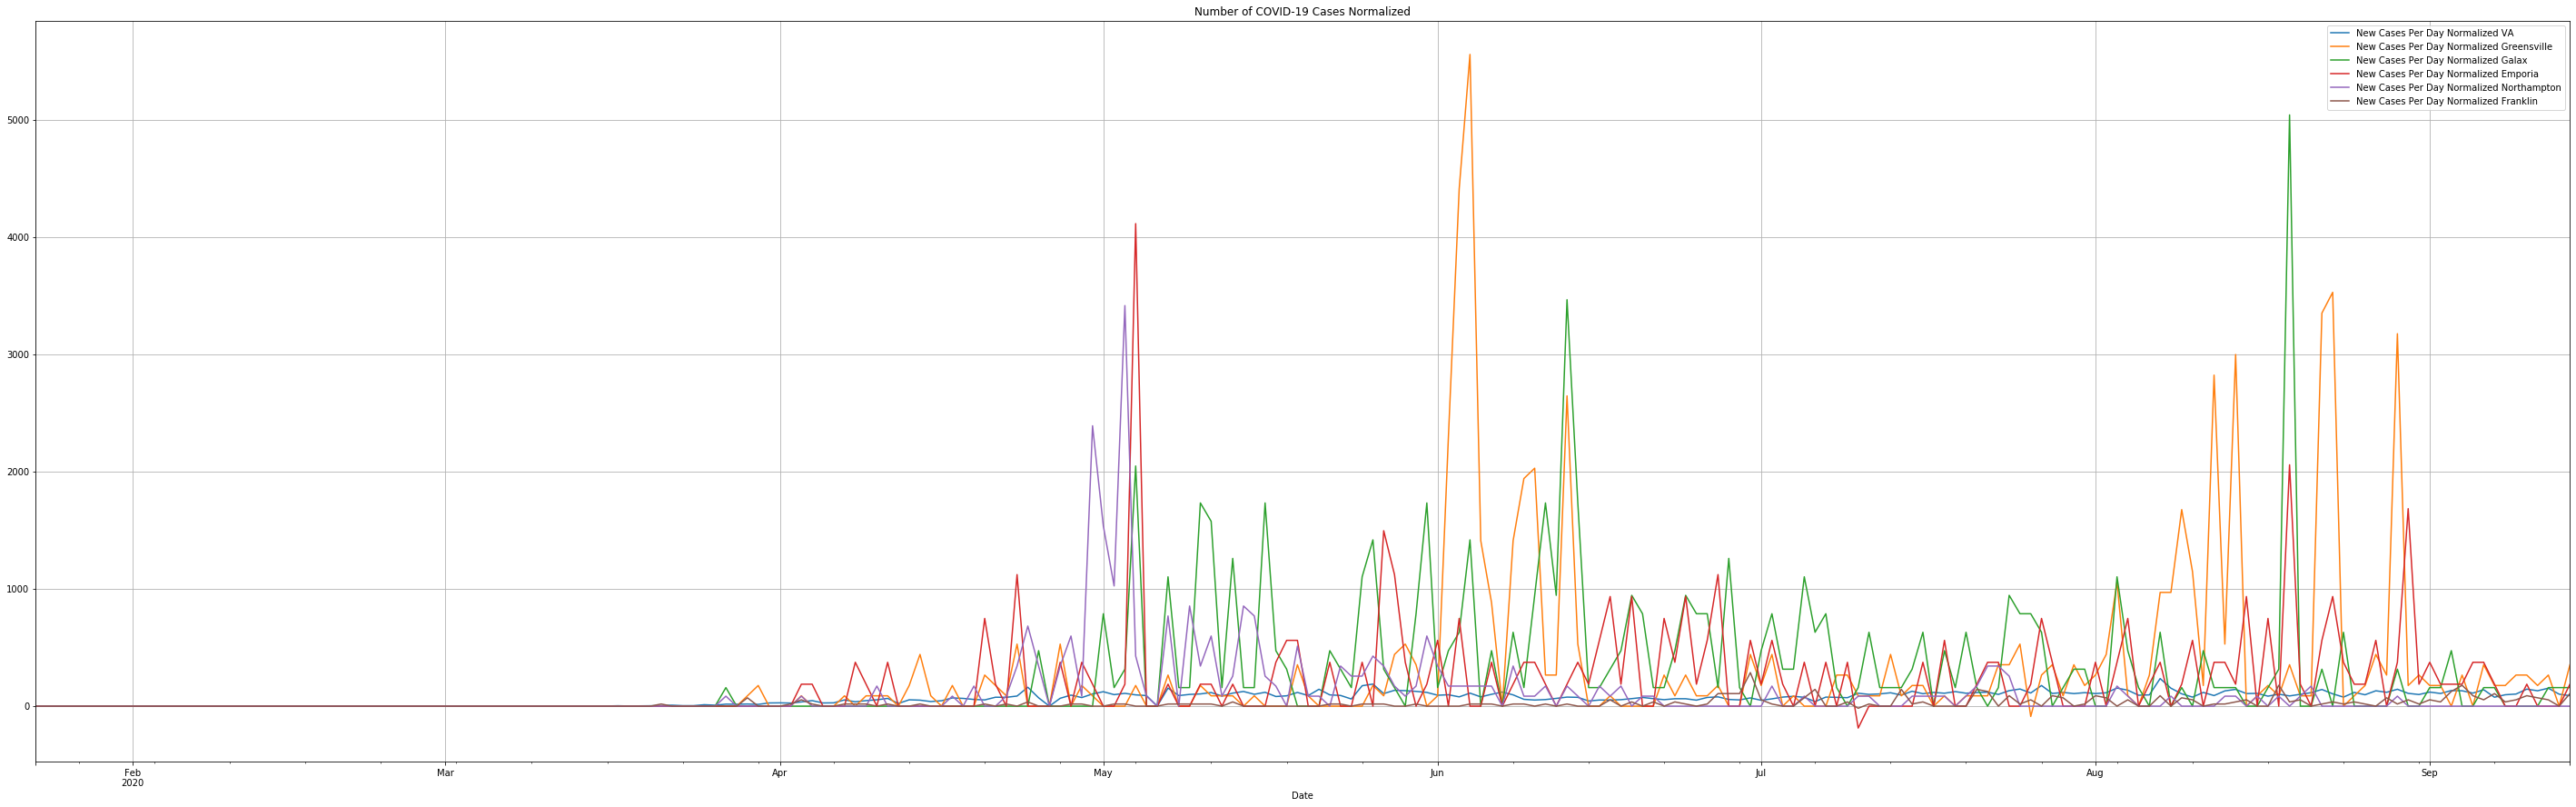

In [30]:
VAcases = topcounties.groupby('Date')['New Cases Per Day Normalized VA'].sum()
Greensvillecases = topcounties.groupby('Date')['New Cases Per Day Normalized Greensville'].sum()
Galaxcases = topcounties.groupby('Date')['New Cases Per Day Normalized Galax'].sum()
Emporiacases = topcounties.groupby('Date')['New Cases Per Day Normalized Emporia'].sum()
Northamptoncases = topcounties.groupby('Date')['New Cases Per Day Normalized Northampton'].sum()
Franklincases = topcounties.groupby('Date')['New Cases Per Day Normalized Franklin'].sum()

VAcases.plot(title='Number of COVID-19 Cases',figsize=(50,15), grid=True,legend=True)
Greensvillecases.plot(title='Number of COVID-19 Cases',figsize=(50,15), grid=True,legend=True)
Galaxcases.plot(title='Number of COVID-19 Cases',figsize=(50,15), grid=True,legend=True)
Emporiacases.plot(title='Number of COVID-19 Cases',figsize=(50,15), grid=True,legend=True)
Northamptoncases.plot(title='Number of COVID-19 Cases',figsize=(50,15), grid=True,legend=True)
Franklincases.plot(title='Number of COVID-19 Cases Normalized',figsize=(50,15), grid=True,legend=True)

## Task 2
*Fit a distribution to the number of COVID-19 cases of Virginia*

In [31]:
VA_data = VA_data[VA_data['County Name'] != 'statewide unallocated']
VA_distribution = VA_data.copy()
VA_distribution['Cases Normalized']= (VA_distribution['Num of Cases']/VA_data['population'])*1000
VA_distribution['Deaths Normalized']= (VA_distribution['Num of Deaths']/VA_data['population'])*1000
VA_distribution


,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,New Cases Per Day,New Deaths Per Day,New Cases Per Day Normalized,New Deaths Per Day Normalized,Cases Normalized,Deaths Normalized
679954,VA,51001,accomack county,2020-01-23,0,0,32316,0.0,0.0,0.000000,0.0,0.000000,0.00000
679955,VA,51001,accomack county,2020-01-24,0,0,32316,0.0,0.0,0.000000,0.0,0.000000,0.00000
679956,VA,51001,accomack county,2020-01-25,0,0,32316,0.0,0.0,0.000000,0.0,0.000000,0.00000
679957,VA,51001,accomack county,2020-01-26,0,0,32316,0.0,0.0,0.000000,0.0,0.000000,0.00000
679958,VA,51001,accomack county,2020-01-27,0,0,32316,0.0,0.0,0.000000,0.0,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
711469,VA,51840,winchester city,2020-09-10,461,4,28078,0.0,0.0,0.000000,0.0,16.418548,0.14246
711470,VA,51840,winchester city,2020-09-11,461,4,28078,0.0,0.0,0.000000,0.0,16.418548,0.14246
711471,VA,51840,winchester city,2020-09-12,465,4,28078,4.0,0.0,0.142460,0.0,16.561009,0.14246
711472,VA,51840,winchester city,2020-09-13,467,4,28078,2.0,0.0,0.071230,0.0,16.632239,0.14246


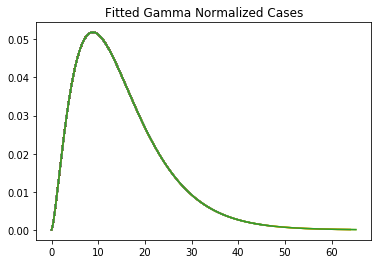

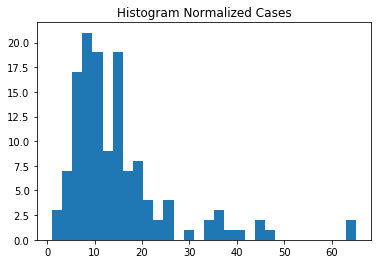

In [32]:
data1 = VA_distribution.groupby('countyFIPS')['Cases Normalized'].max()

x1 = np.linspace (0, data1.mode(), 200)
shape1, loc1, scale1 = stats.gamma.fit(data1, floc=0)
y1 = stats.gamma.pdf(x1, shape1, loc1, scale1)
plt.plot(x1, y1, "y-", label=(r'$\alpha=29, \beta=3$'))

plt.title('Fitted Gamma Normalized Cases')
plt.plot(x1, y1)
plt.show()

plt.title('Histogram Normalized Cases')
plt.hist(data1, bins=30)
plt.show()

*Model a poission distribution of COVID-19 cases and deaths of a Virginia and compare to other 5 states.*

In [33]:
cases = np.mean(np.random.poisson(VA_State_Weekly['New Cases Per Day Normalized VA'].mean(), 52))
deaths = np.mean(np.random.poisson(VA_State_Weekly['New Deaths Per Day Normalized VA'].mean(), 52))
print(cases)
print(deaths)

65.0576923076923
1.2307692307692308


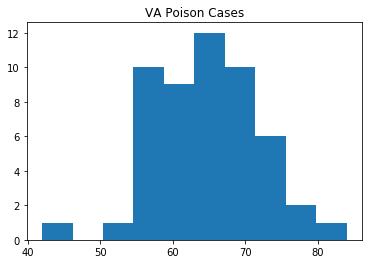

In [34]:
plt.hist(np.random.poisson(VA_State_Weekly['New Cases Per Day Normalized VA'].mean(), 52))
plt.title('VA Poison Cases')
plt.show()

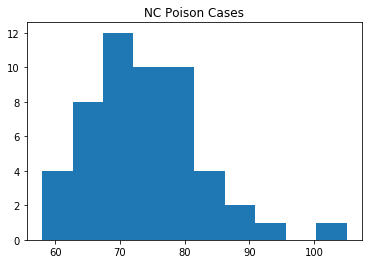

In [35]:
plt.hist(np.random.poisson(NC_State_Weekly['New Cases Per Day Normalized NC'].mean(), 52))
plt.title('NC Poison Cases')
plt.show()

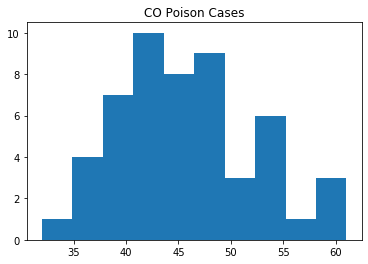

In [36]:
plt.hist(np.random.poisson(CO_State_Weekly['New Cases Per Day Normalized CO'].mean(), 52))
plt.title('CO Poison Cases')
plt.show()

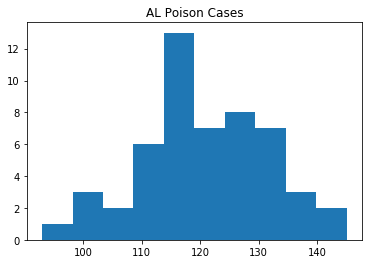

In [37]:
plt.hist(np.random.poisson(AL_State_Weekly['New Cases Per Day Normalized AL'].mean(), 52))
plt.title('AL Poison Cases')
plt.show()

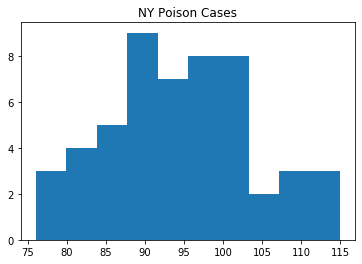

In [38]:
plt.hist(np.random.poisson(NY_State_Weekly['New Cases Per Day Normalized NY'].mean(), 52))
plt.title('NY Poison Cases')
plt.show()

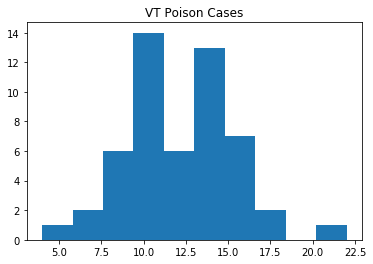

In [39]:
plt.hist(np.random.poisson(VT_State_Weekly['New Cases Per Day Normalized VT'].mean(), 52))
plt.title('VT Poison Cases')
plt.show()

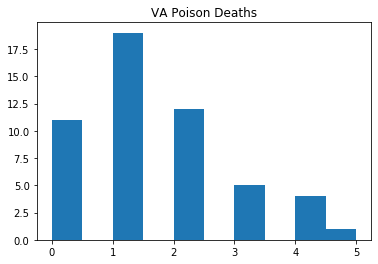

In [40]:
plt.hist(np.random.poisson(VA_State_Weekly['New Deaths Per Day Normalized VA'].mean(), 52))
plt.title('VA Poison Deaths')
plt.show()

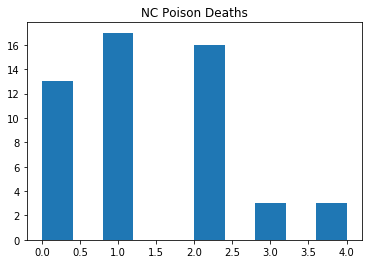

In [41]:
plt.hist(np.random.poisson(NC_State_Weekly['New Deaths Per Day Normalized NC'].mean(), 52))
plt.title('NC Poison Deaths')
plt.show()

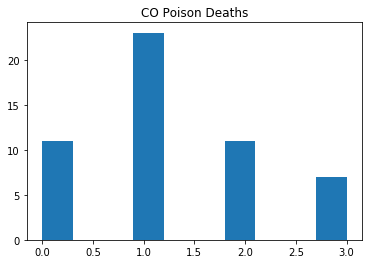

In [42]:
plt.hist(np.random.poisson(CO_State_Weekly['New Deaths Per Day Normalized CO'].mean(), 52))
plt.title('CO Poison Deaths')
plt.show()

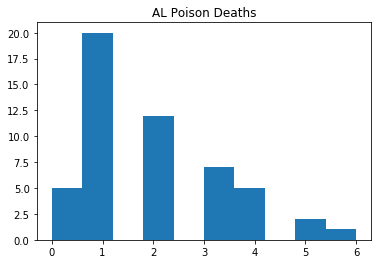

In [43]:
plt.hist(np.random.poisson(AL_State_Weekly['New Deaths Per Day Normalized AL'].mean(), 52))
plt.title('AL Poison Deaths')
plt.show()

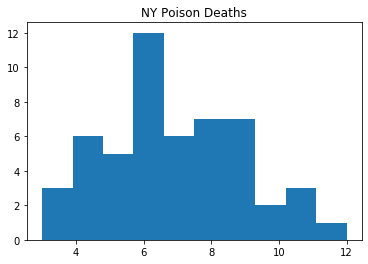

In [44]:
plt.hist(np.random.poisson(NY_State_Weekly['New Deaths Per Day Normalized NY'].mean(), 52))
plt.title('NY Poison Deaths')
plt.show()

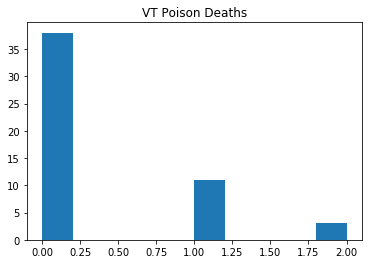

In [45]:
plt.hist(np.random.poisson(VT_State_Weekly['New Deaths Per Day Normalized VT'].mean(), 52))
plt.title('VT Poison Deaths')
plt.show()

*Model poission distributions for North Carolina counties COVID-19 in cases and deaths*

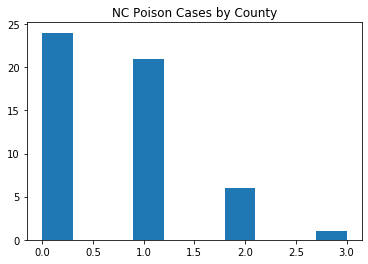

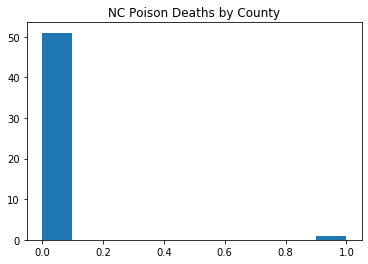

In [46]:
NC_data = NC_main_data.copy()

NC_data = NC_data[NC_data['County Name'] != 'statewide unallocated']
NC_data['New Cases Per Day'] = NC_data['Num of Cases'].diff()
NC_data['New Deaths Per Day'] = NC_data['Num of Deaths'].diff()
NC_data['New Cases Per Day Normalized']= (NC_data['New Cases Per Day']/NC_data['population'])*1000
NC_data['New Deaths Per Day Normalized']= (NC_data['New Deaths Per Day']/NC_data['population'])*1000
NC_data= NC_data[NC_data['Date'] != '2020-01-22']
NC_data = NC_data.fillna(0)

NC_data_cases = NC_data.groupby('County Name')['New Cases Per Day Normalized'].max()
NC_data_deaths = NC_data.groupby('County Name')['New Deaths Per Day Normalized'].max()
NC_high = pd.concat([NC_data_cases, NC_data_deaths], axis=1)
NC_high.columns = ["Cases", "Deaths"]
NC_high.sort_values(['Cases', 'Deaths'], ascending=[False, False])

plt.hist(np.random.poisson(NC_high['Cases'].mean(), 52))
plt.title('NC Poison Cases by County')
plt.show()
plt.hist(np.random.poisson(NC_high['Deaths'].mean(), 52))
plt.title('NC Poison Deaths by County')
plt.show()

*Perform corelation between Education data valiables and COVID-19 cases in Virginia to observe any patterns.*

In [47]:
#selects only necessary collumns
education_data = education_data[['NAME', 'DP02_0053E', 'DP02_0054E', 'DP02_0055E', 'DP02_0056E', 'DP02_0057E', 'DP02_0058E', 'DP02_0059E', 'DP02_0060E', 'DP02_0061E', 'DP02_0062E', 'DP02_0063E', 'DP02_0064E', 'DP02_0065E', 'DP02_0066E', 'DP02_0067E', 'DP02_0068E', 'DP02_0151E', 'DP02_0152E', 'DP02_0153E']]

#removes header row for merge
education_data1 = education_data.drop([0])

#rename columns
education_data1.rename(columns = {'NAME':'County Name'}, inplace = True)
education_data1.rename(columns = {'DP02_0053E':'Total population 3yrs+ in School'}, inplace = True)
education_data1.rename(columns = {'DP02_0054E':'Population 3yrs+ in preschool'}, inplace = True)
education_data1.rename(columns = {'DP02_0055E':'Population 3yrs+ in kindergarten'}, inplace = True)
education_data1.rename(columns = {'DP02_0056E':'Population 3yrs+ in grades 1 - 8'}, inplace = True)
education_data1.rename(columns = {'DP02_0057E':'Population 3yrs+ in grades 9 - 12'}, inplace = True)
education_data1.rename(columns = {'DP02_0058E':'Population 3yrs+ in college or grad school'}, inplace = True)
education_data1.rename(columns = {'DP02_0059E':'total opulation 25yrs+'}, inplace = True)
education_data1.rename(columns = {'DP02_0060E':'Population 25yrs+ with less than grade 9'}, inplace = True)
education_data1.rename(columns = {'DP02_0061E':'Population 25yrs+ with some highschool, no diploma'}, inplace = True)
education_data1.rename(columns = {'DP02_0062E':'Population 25yrs+ with highschool diploma/GED'}, inplace = True)
education_data1.rename(columns = {'DP02_0063E':'Population 25yrs+ with some college, no degree'}, inplace = True)
education_data1.rename(columns = {'DP02_0064E':'Population 25yrs+ with associates degree'}, inplace = True)
education_data1.rename(columns = {'DP02_0065E':'Population 25yrs+ with bachelors degree'}, inplace = True)
education_data1.rename(columns = {'DP02_0066E':'Population 25yrs+ with graduate/professional degree'}, inplace = True)
education_data1.rename(columns = {'DP02_0067E':'Population 25yrs+ highschool graduate or higher'}, inplace = True)
education_data1.rename(columns = {'DP02_0068E':'Population 25yrs+ bachelors degree or higher'}, inplace = True)
education_data1.rename(columns = {'DP02_0151E':'Total Households'}, inplace = True)
education_data1.rename(columns = {'DP02_0152E':'Total Households with a computer'}, inplace = True)
education_data1.rename(columns = {'DP02_0153E':'Total Households with a broadband internet subscription'}, inplace = True)

#make country name lowercase and remove state name after comma
education_data1['County Name'] = education_data1['County Name'].apply(lambda cn: cn.lower().strip())
education_data1['County Name'] = education_data1['County Name'].apply(lambda cn: cn.split(",")[0])


VA_ed_data = pd.merge(main_data, education_data1)
VA_ed_data = VA_ed_data[VA_ed_data['State'] == 'VA']
VA_ed_data

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,Total population 3yrs+ in School,Population 3yrs+ in preschool,Population 3yrs+ in kindergarten,...,Population 25yrs+ with highschool diploma/GED,"Population 25yrs+ with some college, no degree",Population 25yrs+ with associates degree,Population 25yrs+ with bachelors degree,Population 25yrs+ with graduate/professional degree,Population 25yrs+ highschool graduate or higher,Population 25yrs+ bachelors degree or higher,Total Households,Total Households with a computer,Total Households with a broadband internet subscription
15168,VA,51043,clarke county,2020-01-22,0,0,14619,50460,1191,2741,...,11545,12348,7010,17499,17015,65417,34514,52124,48693,44701
15169,VA,51043,clarke county,2020-01-23,0,0,14619,50460,1191,2741,...,11545,12348,7010,17499,17015,65417,34514,52124,48693,44701
15170,VA,51043,clarke county,2020-01-24,0,0,14619,50460,1191,2741,...,11545,12348,7010,17499,17015,65417,34514,52124,48693,44701
15171,VA,51043,clarke county,2020-01-25,0,0,14619,50460,1191,2741,...,11545,12348,7010,17499,17015,65417,34514,52124,48693,44701
15172,VA,51043,clarke county,2020-01-26,0,0,14619,50460,1191,2741,...,11545,12348,7010,17499,17015,65417,34514,52124,48693,44701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832813,VA,51810,virginia beach city,2020-09-10,6345,71,449974,112807,9051,4087,...,58145,77436,37937,71164,47433,292115,118597,175029,169091,162381
832814,VA,51810,virginia beach city,2020-09-11,6368,71,449974,112807,9051,4087,...,58145,77436,37937,71164,47433,292115,118597,175029,169091,162381
832815,VA,51810,virginia beach city,2020-09-12,6421,72,449974,112807,9051,4087,...,58145,77436,37937,71164,47433,292115,118597,175029,169091,162381
832816,VA,51810,virginia beach city,2020-09-13,6453,72,449974,112807,9051,4087,...,58145,77436,37937,71164,47433,292115,118597,175029,169091,162381


In [48]:
VA_ed_data['New Cases Per Day'] = VA_ed_data['Num of Cases'].diff()
VA_ed_data['New Deaths Per Day'] = VA_ed_data['Num of Deaths'].diff()
VA_ed_data['New Cases Per Day Normalized']= (VA_ed_data['New Cases Per Day']/VA_ed_data['population'])*100000
VA_ed_data['New Deaths Per Day Normalized']= (VA_ed_data['New Deaths Per Day']/VA_ed_data['population'])*100000
VA_ed_data= VA_ed_data[VA_ed_data['Date'] != '2020-01-22']
VA_ed_data = VA_ed_data.fillna(0)
VA_ed_data

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,Total population 3yrs+ in School,Population 3yrs+ in preschool,Population 3yrs+ in kindergarten,...,Population 25yrs+ with graduate/professional degree,Population 25yrs+ highschool graduate or higher,Population 25yrs+ bachelors degree or higher,Total Households,Total Households with a computer,Total Households with a broadband internet subscription,New Cases Per Day,New Deaths Per Day,New Cases Per Day Normalized,New Deaths Per Day Normalized
15169,VA,51043,clarke county,2020-01-23,0,0,14619,50460,1191,2741,...,17015,65417,34514,52124,48693,44701,0.0,0.0,0.000000,0.000000
15170,VA,51043,clarke county,2020-01-24,0,0,14619,50460,1191,2741,...,17015,65417,34514,52124,48693,44701,0.0,0.0,0.000000,0.000000
15171,VA,51043,clarke county,2020-01-25,0,0,14619,50460,1191,2741,...,17015,65417,34514,52124,48693,44701,0.0,0.0,0.000000,0.000000
15172,VA,51043,clarke county,2020-01-26,0,0,14619,50460,1191,2741,...,17015,65417,34514,52124,48693,44701,0.0,0.0,0.000000,0.000000
15173,VA,51043,clarke county,2020-01-27,0,0,14619,50460,1191,2741,...,17015,65417,34514,52124,48693,44701,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832813,VA,51810,virginia beach city,2020-09-10,6345,71,449974,112807,9051,4087,...,47433,292115,118597,175029,169091,162381,40.0,0.0,8.889402,0.000000
832814,VA,51810,virginia beach city,2020-09-11,6368,71,449974,112807,9051,4087,...,47433,292115,118597,175029,169091,162381,23.0,0.0,5.111406,0.000000
832815,VA,51810,virginia beach city,2020-09-12,6421,72,449974,112807,9051,4087,...,47433,292115,118597,175029,169091,162381,53.0,1.0,11.778458,0.222235
832816,VA,51810,virginia beach city,2020-09-13,6453,72,449974,112807,9051,4087,...,47433,292115,118597,175029,169091,162381,32.0,0.0,7.111522,0.000000


*Formulate hypothesis between Enrichment data and number of cases to be compared against states* <br>
1. Higher educational achievement results in lower normalized number of cases <br>
2. Higher broadband access results in lower normalized number of cases <br>
3. Lower households with computers results in higher normalized cases <br>

In [49]:
VA_ed_data_high  = VA_ed_data.nlargest(25, 'New Cases Per Day Normalized' )
VA_ed_data_high

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,Total population 3yrs+ in School,Population 3yrs+ in preschool,Population 3yrs+ in kindergarten,...,Population 25yrs+ with graduate/professional degree,Population 25yrs+ highschool graduate or higher,Population 25yrs+ bachelors degree or higher,Total Households,Total Households with a computer,Total Households with a broadband internet subscription,New Cases Per Day,New Deaths Per Day,New Cases Per Day Normalized,New Deaths Per Day Normalized
597472,VA,51159,richmond county,2020-05-17,261,4,9023,47574,2723,1578,...,10270,116081,26666,68361,62950,56024,57.0,0.0,631.718940,0.000000
597420,VA,51159,richmond county,2020-04-21,53,0,9023,47574,2723,1578,...,10270,116081,26666,68361,62950,56024,44.0,0.0,487.642691,0.000000
597432,VA,51159,richmond county,2020-04-27,132,0,9023,47574,2723,1578,...,10270,116081,26666,68361,62950,56024,43.0,0.0,476.559902,0.000000
597452,VA,51159,richmond county,2020-05-07,187,2,9023,47574,2723,1578,...,10270,116081,26666,68361,62950,56024,42.0,1.0,465.477114,11.082788
789075,VA,51131,northampton county,2020-05-03,134,1,11710,73054,3611,3209,...,24786,196422,66256,114950,103741,97390,40.0,1.0,341.588386,8.539710
812369,VA,51193,westmoreland county,2020-07-10,171,2,18015,67798,5049,3356,...,26518,245218,76049,155147,138038,130542,47.0,0.0,260.893700,0.000000
789072,VA,51131,northampton county,2020-04-30,64,0,11710,73054,3611,3209,...,24786,196422,66256,114950,103741,97390,28.0,0.0,239.111870,0.000000
542980,VA,51183,sussex county,2020-05-26,135,1,11159,46575,3224,2077,...,23758,157184,55382,96624,89781,82621,21.0,0.0,188.188906,0.000000
787276,VA,51117,mecklenburg county,2020-08-08,440,32,30587,282063,20902,12944,...,119534,679319,343595,426313,407120,387089,55.0,0.0,179.814954,0.000000
723785,VA,51077,grayson county,2020-09-02,225,8,15550,32533,1539,2200,...,6667,82416,19959,49024,44234,39334,26.0,1.0,167.202572,6.430868
